In [1]:
#installations
%pip install image | tail -n 1
%pip install -U "ibm_watsonx_ai>=1.1.14" | tail -n 1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#imports
import requests
import base64
import getpass

from PIL import Image
from ibm_watsonx_ai import Credentials
from ibm_watsonx_ai.foundation_models import ModelInference

In [24]:
WATSONX_EU_APIKEY = ("b66IXKwtuNfVXgk2wEafqT4oak35nT5ggUySPgBg3-Kl")

WATSONX_EU_PROJECT_ID = ("09c41291-0ace-4742-8066-b5b2df2d2db0")

URL = "https://eu-gb.ml.cloud.ibm.com"

In [25]:
credentials = Credentials(
    url=URL,
    api_key=WATSONX_EU_APIKEY
)

In [26]:
url_image_1 = 'https://storage.googleapis.com/static.marham.pk/assets/files/8801-heart-issue-marham-91.jpeg'
url_image_2 = 'https://storage.googleapis.com/static.marham.pk/assets/files/8801-heart-issue-marham-7.jpeg'

image_urls = [url_image_1, url_image_2]

url_image_0


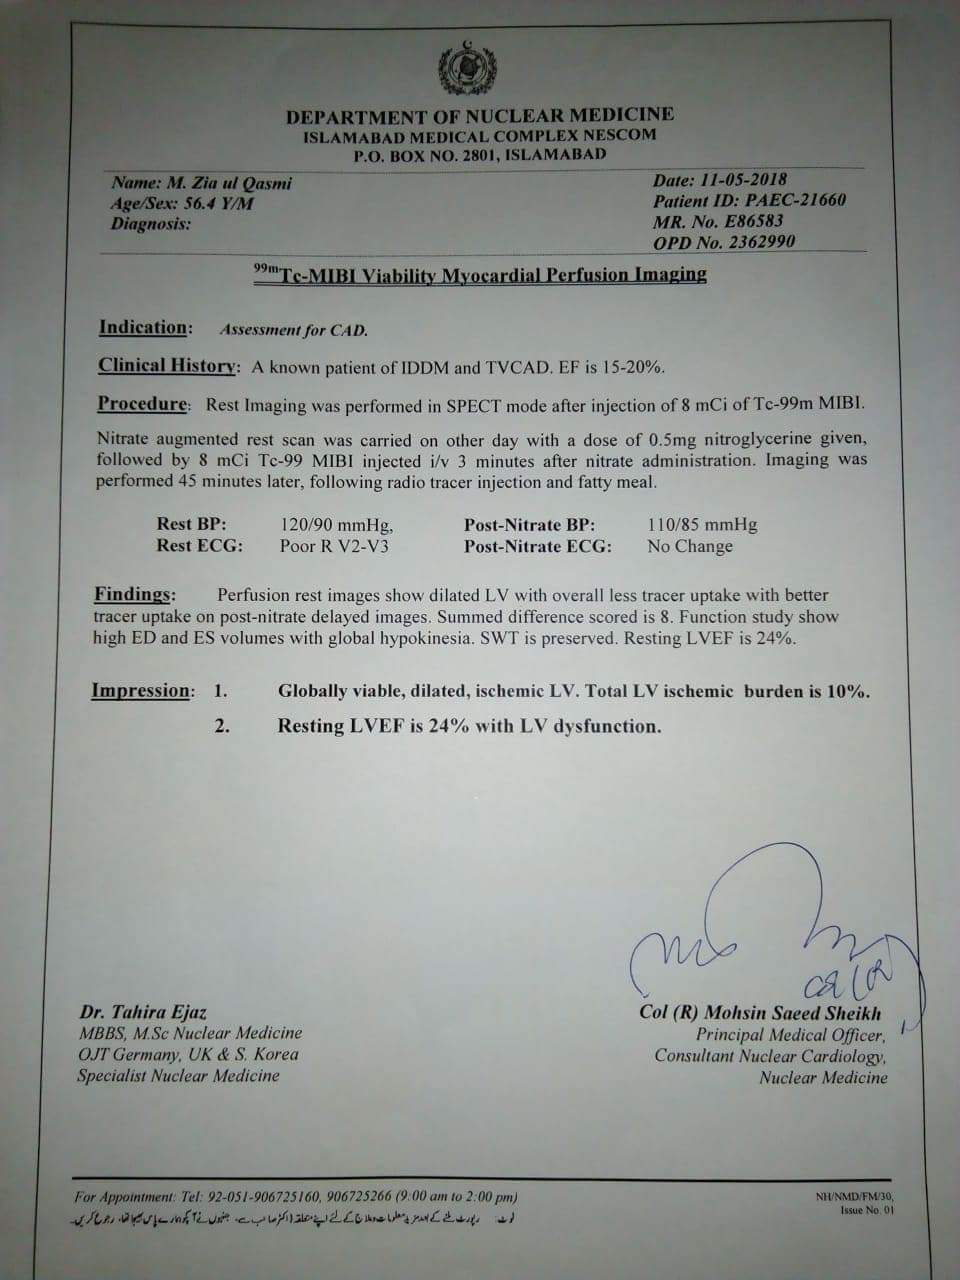

url_image_1


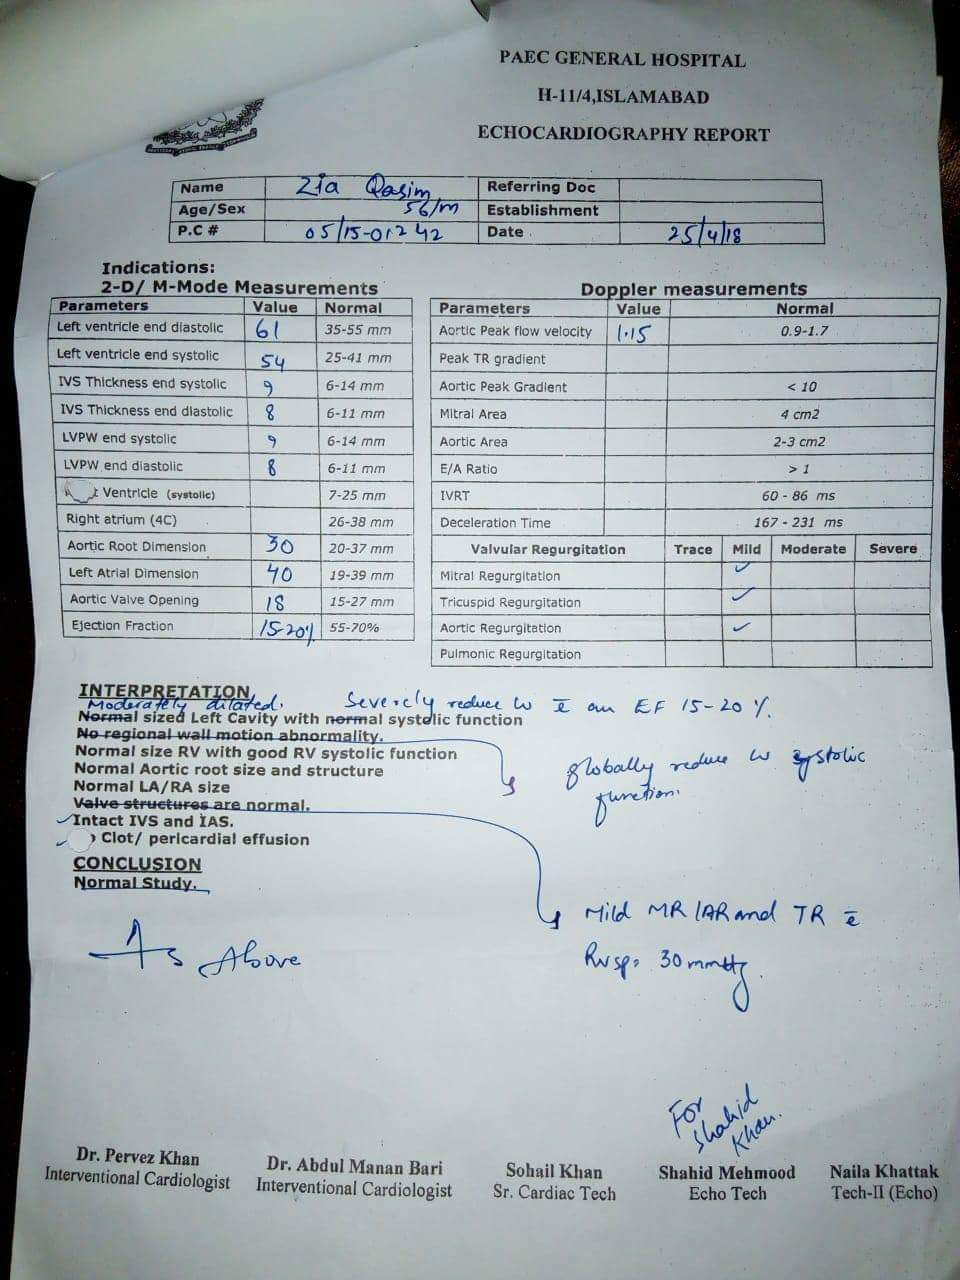

In [27]:
for idx, url in enumerate(image_urls):
    print(f'url_image_{idx}')
    display(Image.open(requests.get(url, stream=True).raw))

In [28]:
encoded_images = []

for url in image_urls:
    encoded_images.append(base64.b64encode(requests.get(url).content).decode("utf-8"))

In [29]:
def augment_api_request_body(user_query, image):

    messages = [
        {
            "role": "user",
            "content": [{
                "type": "text",
                "text": 'You are a helpful assistant. Answer the following user query in 1 or 2 sentences: ' + user_query
            },
            {
                "type": "image_url",
                "image_url": {
                "url": f"data:image/jpeg;base64,{image}",
                }
            }]
        }
    ]

    return messages

In [32]:
model = ModelInference(
    model_id="mistralai/pixtral-12b",
    credentials=credentials,
    project_id=WATSONX_EU_PROJECT_ID,
    params={
        "max_tokens": 200
      }
)

In [33]:
for i in range(len(encoded_images)):
	image = encoded_images[i]

	user_query = "What kind of disease this person is having?"

	messages = augment_api_request_body(user_query, image)

	response = model.chat(messages=messages)

	print(response['choices'][0]['message']['content'])

The person is having a globally viable, dilated, ischemic left ventricle with a total left ventricular ischemic burden of 10%, along with LV dysfunction and a resting LVEF of 24%.
The individual, a 56-year-old male, has moderate to severe mitral regurgitation, which is a condition where the mitral valve in the heart does not close properly, allowing blood to flow backward in the heart.


In [35]:
image = encoded_images[1]

user_query = "What is the value of Aortic Root Dimension"

messages = augment_api_request_body(user_query, image)

response = model.chat(messages=messages)

print(response['choices'][0]['message']['content'])

The value of Aortic Root Dimension in the provided echocardiography report is 30 mm.
